# Chapter 3. Sequence objects

Biological sequences are arguably the central object in Bioinformatics, and in this chapter we’ll introduce
the Biopython mechanism for dealing with sequences, the Seq object. 

The most important difference between Seq objects and standard Python strings is they have different
methods. Although the Seq object supports many of the same methods as a plain string, its translate()
method differs by doing biological translation, and there are also additional biologically relevant methods
like reverse_complement().

## 3.1 Sequences act like strings
In most ways, we can deal with Seq objects as if they were normal Python strings, for example getting the length, or iterating over the elements:

In [ ]:
from Bio.Seq import Seq
my_seq = Seq("GATCG")
for index, letter in enumerate(my_seq):
    print("%i %s" % (index, letter))

0 G
1 A
2 T
3 C
4 G


In [ ]:
print(len(my_seq))

5


You can access elements of the sequence in the same way as for strings (but remember, Python counts from zero!):

In [ ]:
print(my_seq[0]) # first letter
print(my_seq[2]) # third letter
print(my_seq[-1]) # last letter

G
T
G


The Seq object has a `.count()` method, just like a string. Note that this means that like a Python string, this gives a non-overlapping count:

In [ ]:
from Bio.Seq import Seq
"AAAA".count("AA")
Seq("AAAA").count("AA")

2

For some biological uses, you may actually want an overlapping count (i.e. 3 in this trivial example). When searching for single letters, this makes no difference:

In [ ]:
from Bio.Seq import Seq
my_seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCGC")
len(my_seq)
my_seq.count("G")
100 * (my_seq.count("G") + my_seq.count("C")) / len(my_seq)

46.875

While you could use the above snippet of code to calculate a GC%, note that the Bio.SeqUtils module has several GC functions already built. For example:

In [ ]:
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction
my_seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCGC")
gc_fraction(my_seq)

0.46875

Note that using the `Bio.SeqUtils.gc_fraction()` function should automatically cope with mixed case sequences and the ambiguous nucleotide S which means G or C.
Also note that just like a normal Python string, the Seq object is in some ways “read-only”. If you need to edit your sequence, for example simulating a point mutation, look at the Section 3.13 below which talks about the `MutableSeq` object.

## 3.2 Slicing a sequence
A more complicated example, let’s get a slice of the sequence:

In [ ]:
from Bio.Seq import Seq
my_seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCGC")
my_seq[4:12]

Seq('GATGGGCC')

Note that ‘Seq‘ objects follow the usual indexing conventions for Python strings, with the first element of the sequence numbered 0. When you do a slice the first item is included (i.e. 4 in this case) and the last is excluded (12 in this case).

Also like a Python string, you can do slices with a start, stop and stride (the step size, which defaults to one). For example, we can get the first, second and third codon positions of this DNA sequence:

In [ ]:
my_seq[0::3]
my_seq[1::3]
my_seq[2::3]

Seq('TAGCTAAGAC')

Another stride trick you might have seen with a Python string is the use of a -1 stride to reverse the string. You can do this with a Seq object too:

In [ ]:
my_seq[::-1]

Seq('CGCTAAAAGCTAGGATATATCCGGGTAGCTAG')

## 3.3 Turning Seq objects into strings
If you really do just need a plain string, for example to write to a file, or insert into a database, then this is very easy to get:

In [ ]:
str(my_seq)

'GATCGATGGGCCTATATAGGATCGAAAATCGC'

Since calling str() on a Seq object returns the full sequence as a string, you often don’t actually have to do this conversion explicitly. Python does this automatically in the print function:

In [ ]:
print(my_seq)

GATCGATGGGCCTATATAGGATCGAAAATCGC


You can also use the Seq object directly with a %s placeholder when using the Python string formatting or interpolation operator (%):

In [ ]:
fasta_format_string = ">Name\n%s\n" % my_seq
print(fasta_format_string)

>Name
GATCGATGGGCCTATATAGGATCGAAAATCGC



## 3.4 Concatenating or adding sequences

In [ ]:
from Bio.Seq import Seq
seq1 = Seq("ACGT")
seq2 = Seq("AACCGG")
seq1 + seq2

Seq('ACGTAACCGG')

In [ ]:
from Bio.Seq import Seq
protein_seq = Seq("EVRNAK")
dna_seq = Seq("ACGT")
protein_seq + dna_seq

Seq('EVRNAKACGT')

In [ ]:
from Bio.Seq import Seq
list_of_seqs = [Seq("ACGT"), Seq("AACC"), Seq("GGTT")]
concatenated = Seq("")
for s in list_of_seqs:
    concatenated += s
concatenated

Seq('ACGTAACCGGTT')

In [ ]:
from Bio.Seq import Seq
contigs = [Seq("ATG"), Seq("ATCCCG"), Seq("TTGCA")]
spacer = Seq("N" * 10)
spacer.join(contigs)

Seq('ATGNNNNNNNNNNATCCCGNNNNNNNNNNTTGCA')

## 3.5 Changing case

In [ ]:
from Bio.Seq import Seq
dna_seq = Seq("acgtACGT")
dna_seq
dna_seq.upper()
dna_seq.lower()

Seq('acgtacgt')

In [ ]:
"GTAC" in dna_seq
"GTAC" in dna_seq.upper()

True

## 3.6 Nucleotide sequences and (reverse) complements

In [ ]:
from Bio.Seq import Seq
my_seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCGC")
my_seq
my_seq.complement()
my_seq.reverse_complement()

Seq('GCGATTTTCGATCCTATATAGGCCCATCGATC')

In [ ]:
my_seq[::-1]

Seq('CGCTAAAAGCTAGGATATATCCGGGTAGCTAG')

In [ ]:
from Bio.Seq import Seq
protein_seq = Seq("EVRNAK")
protein_seq.complement()

Seq('EBYNTM')

## 3.8 Translation

In [ ]:
from Bio.Seq import Seq
messenger_rna = Seq("AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG")
messenger_rna
messenger_rna.translate()

Seq('MAIVMGR*KGAR*')

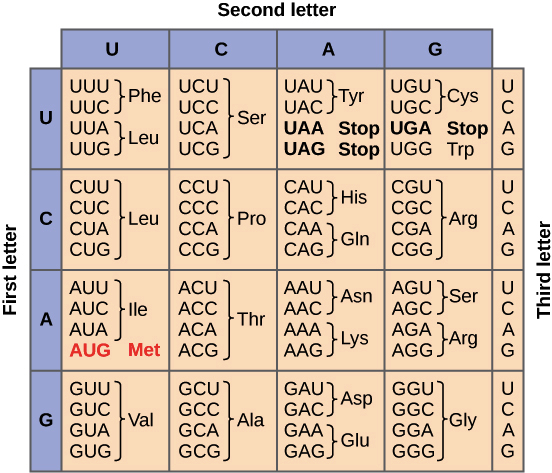
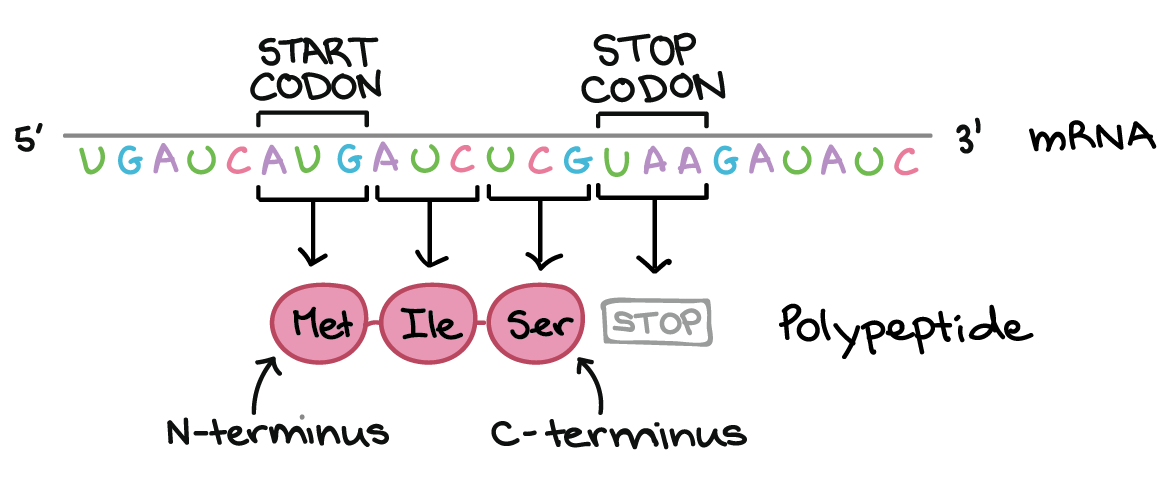

In [ ]:
from Bio.Seq import Seq
coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")
coding_dna
coding_dna.translate()

Seq('MAIVMGR*KGAR*')

In [ ]:
coding_dna.translate(table="Vertebrate Mitochondrial")

Seq('MAIVMGRWKGAR*')

In [ ]:
coding_dna.translate(table=2)

Seq('MAIVMGRWKGAR*')

Now, you may want to translate the nucleotides up to the first in frame stop codon, and then stop (as happens in nature):

In [ ]:
coding_dna.translate()
coding_dna.translate(to_stop=True)
coding_dna.translate(table=2)
coding_dna.translate(table=2, to_stop=True)

Seq('MAIVMGRWKGAR')

Notice that when you use the `to_stop` argument, the stop codon itself is not translated - and the stop symbol is not included at the end of your protein sequence.

You can even specify the stop symbol if you don’t like the default asterisk:

In [ ]:
coding_dna.translate(table=2, stop_symbol="@")

Seq('MAIVMGRWKGAR@')

Now, suppose you have a complete coding sequence CDS, which is to say a nucleotide sequence (e.g. mRNA – after any splicing) which is a whole number of codons (i.e. the length is a multiple of three), commences with a start codon, ends with a stop codon, and has no internal in-frame stop codons. In general, given a complete CDS, the default translate method will do what you want (perhaps with the to_stop option). However, what if your sequence uses a non-standard start codon? This happens a lot in bacteria – for example the gene yaaX in E. `coli` K12:

In [ ]:
from Bio.Seq import Seq
gene = Seq(
    "GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCCATGGCA"
    "GCACAGGCTGCGGAAATTACGTTAGTCCCGTCAGTAAAATTACAGATAGGCGATCGTGAT"
    "AATCGTGGCTATTACTGGGATGGAGGTCACTGGCGCGACCACGGCTGGTGGAAACAACAT"
    "TATGAATGGCGAGGCAATCGCTGGCACCTACACGGACCGCCGCCACCGCCGCGCCACCAT"
    "AAGAAAGCTCCTCATGATCATCACGGCGGTCATGGTCCAGGCAAACATCACCGCTAA"
    )
gene.translate(table="Bacterial")
gene.translate(table="Bacterial", to_stop=True)

Seq('VKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDH...HHR')

In the bacterial genetic code GTG is a valid start codon, and while it does normally encode Valine, if used as a start codon it should be translated as methionine. This happens if you tell Biopython your sequence is a complete CDS:

In [ ]:
gene.translate(table="Bacterial", cds=True)

Seq('MKKMQSIVLALSLVLVAPMAAQAAEITLVPSVKLQIGDRDNRGYYWDGGHWRDH...HHR')

## 3.9 Translation Tables
As before, let’s just focus on two choices: the Standard translation table, and the translation table for Vertebrate Mitochondrial DNA.

In [ ]:
from Bio.Data import CodonTable
standard_table = CodonTable.unambiguous_dna_by_name["Standard"]
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]

In [ ]:
from Bio.Data import CodonTable
standard_table = CodonTable.unambiguous_dna_by_id[1]
mito_table = CodonTable.unambiguous_dna_by_id[2]

In [ ]:
print(standard_table)

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [ ]:
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [ ]:
mito_table.stop_codons
mito_table.start_codons
mito_table.forward_table["ACG"]

'T'

## 3.10 Comparing Seq objects

In [ ]:
from Bio.Seq import Seq
seq1 = Seq("ACGT")
"ACGT" == seq1
seq1 == "ACGT"

True

## 3.11 Sequences with unknown sequence contents

In [ ]:
from Bio.Seq import Seq
unknown_seq = Seq(None, 10)

In [ ]:
unknown_seq
Seq(None, length=10)
len(unknown_seq)
print(unknown_seq)  # Bio.Seq.UndefinedSequenceError: Sequence content is undefined

UndefinedSequenceError: ignored

## 3.12 Sequences with partially defined sequence contents

Sometimes the sequence contents is defined for parts of the sequence only, and undefined elsewhere. For example, the following excerpt of a MAF (Multiple Alignment Format) file shows an alignment of human, chimp, macaque, mouse, rat, dog, and opossum genome sequences:

```
s hg38.chr7   117512683 36 + 159345973 TTGAAAACCTGAATGTGAGAGTCAGTCAAGGATAGT
s panTro4.chr7   119000876 36 + 161824586 TTGAAAACCTGAATGTGAGAGTCACTCAAGGATAGT
s rheMac3.chr3   156330991 36 + 198365852 CTGAAATCCTGAATGTGAGAGTCAATCAAGGATGGT
s mm10.chr6   18207101 36 + 149736546 CTGAAAACCTAAGTAGGAGAATCAACTAAGGATAAT
s rn5.chr4   42326848 36 + 248343840 CTGAAAACCTAAGTAGGAGAGACAGTTAAAGATAAT
s canFam3.chr14   56325207 36 + 60966679 TTGAAAAACTGATTATTAGAGTCAATTAAGGATAGT
s monDom5.chr8   173163865 36 + 312544902 TTAAGAAACTGGAAATGAGGGTTGAATGACAAACTT
```
In each row, the first number indicates the starting position (in zero-based coordinates) of the aligned sequence on the chromosome, followed by the size of the aligned sequence, the strand, the size of the full chromosome, and the aligned sequence.

A Seq object representing such a partially defined sequence can be created using a dictionary for the data argument, where the keys are the starting coordinates of the known sequence segments, and the values are the corresponding sequence contents. For example, for the first sequence we would use

In [ ]:
from Bio.Seq import Seq
seq = Seq({117512683: "TTGAAAACCTGAATGTGAGAGTCAGTCAAGGATAGT"}, length=159345973)

In [ ]:
seq[1000:1020]
seq[117512690:117512700]
seq[117512670:117512690]
seq[117512700:]

Seq({0: 'AGAGTCAGTCAAGGATAGT'}, length=41833273)

In [ ]:
seq = Seq("ACGT")
undefined_seq = Seq(None, length=10)
seq + undefined_seq + seq

Seq({0: 'ACGT', 14: 'ACGT'}, length=18)

## 3.13 MutableSeq objects
Just like the normal Python string, the Seq object is “read only”, or in Python terminology, immutable.

Apart from wanting the Seq object to act like a string, this is also a useful default since in many biological applications you want to ensure you are not changing your sequence data:

In [ ]:
from Bio.Seq import Seq
my_seq = Seq("GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA")

In [ ]:
my_seq[5] = "G" # TypeError: 'Seq' object does not support item assignment

TypeError: ignored

However, you can convert it into a mutable sequence (a `MutableSeq` object) and do pretty much anything you want with it:

In [ ]:
from Bio.Seq import MutableSeq
mutable_seq = MutableSeq(my_seq)
mutable_seq

MutableSeq('GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA')

In [ ]:
from Bio.Seq import MutableSeq
mutable_seq = MutableSeq("GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA")

In [ ]:
mutable_seq
mutable_seq[5] = "C"
mutable_seq
mutable_seq.remove("T")
mutable_seq
mutable_seq.reverse()
mutable_seq

MutableSeq('AGCCCGTGGGAAAGTCGCCGGGTAATGCACCG')

Once you have finished editing your a `MutableSeq` object, it’s easy to get back to a read-only Seq object should you need to:

In [ ]:
from Bio.Seq import Seq
new_seq = Seq(mutable_seq)
new_seq

Seq('AGCCCGTGGGAAAGTCGCCGGGTAATGCACCG')

## 3.14 Working with strings directly

In [ ]:
from Bio.Seq import reverse_complement, transcribe, back_transcribe, translate
my_string = "GCTGTTATGGGTCGTTGGAAGGGTGGTCGTGCTGCTGGTTAG"
reverse_complement(my_string)
transcribe(my_string)
back_transcribe(my_string)
translate(my_string)

'AVMGRWKGGRAAG*'